# spectral clustering

## basic example from sklearn website (with plotting added)

In [1]:
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import manifold
from sklearn.manifold import spectral_embedding
from sklearn import svm
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import warnings
import random
import scipy

In [2]:
import numpy as np
from scipy import sparse
from scipy.linalg import eigh
from scipy.sparse.linalg import eigsh, lobpcg
from scipy.sparse.csgraph import connected_components
from scipy.sparse.csgraph import laplacian as csgraph_laplacian

from sklearn.base import BaseEstimator
from sklearn.utils import check_random_state, check_array, check_symmetric
from sklearn.utils.extmath import _deterministic_vector_sign_flip
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neighbors import kneighbors_graph

In [3]:
from lib import *

## generating data set

In [4]:
n_samples = 500
random_state = 170
n_centers = 12
X = datasets.make_blobs(n_samples=n_samples, centers = n_centers,n_features=2,cluster_std=0.4)[0]

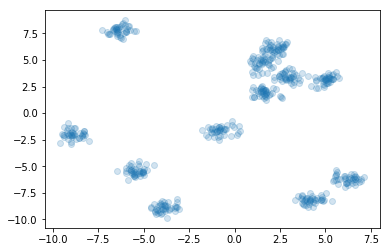

In [5]:
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.show()

## Making sure clustering algorithm with correct number of centers clusters it correctly

In [6]:
spectral = cluster.SpectralClustering(n_clusters=n_centers,
                                      assign_labels="discretize",
                                      random_state=0,
                                      #affinity = 'nearest_neighbors',
                                      #n_neighbors=8
                                      #gamma=1e2
                                     )
spectral.fit(X)

/home/mouth_breather/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=12, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=0)

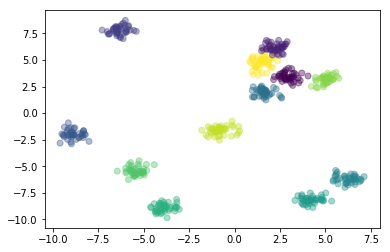

In [7]:
plt.scatter(X[:,0],X[:,1],c=spectral.labels_,alpha = 0.4)
plt.show()

## Experimenting

In [8]:
my_embedding = spectral_embedding(spectral.affinity_matrix_,
                                n_components = spectral.n_clusters,
                                eigen_solver = spectral.eigen_solver,
                                random_state = spectral.random_state)

/home/mouth_breather/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


In [9]:
my_embedding

array([[ 6.51623706e-01,  1.73859927e-02,  4.44369560e-08, ...,
         3.49599266e-17, -2.82090442e-16, -7.71529414e-17],
       [ 7.60006881e-02,  2.87901227e-01, -2.02075520e-01, ...,
         7.72888354e-01, -3.39607324e-01,  5.05597413e-05],
       [ 3.11501688e-02,  1.18001193e-01, -8.28152045e-02, ...,
         7.26351404e-06,  1.25042473e-07,  1.04016438e+00],
       ...,
       [ 4.56755130e-01,  1.21866981e-02,  3.11480500e-08, ...,
         1.04158685e-15, -2.19015841e-16, -1.42107974e-15],
       [ 7.42046768e-02,  2.81097685e-01, -1.97300167e-01, ...,
        -3.19681392e-01, -3.45344631e-03, -1.13901095e-04],
       [ 6.88362486e-02,  2.60761280e-01,  4.26280503e-01, ...,
        -5.73645320e-16, -4.49027814e-16, -1.23585408e-12]])

In [12]:
import lib

In [14]:
dir(lib)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [13]:
laplacian = lib.get_laplacian(spectral.affinity_matrix_,
                                n_components = spectral.n_clusters,
                                eigen_solver = spectral.eigen_solver,
                                random_state = spectral.random_state)

AttributeError: module 'lib' has no attribute 'get_laplacian'

In [642]:
if type(laplacian)==scipy.sparse.csr.csr_matrix:
    laplacian=np.array(laplacian.todense())
print(type(laplacian))

<class 'numpy.ndarray'>


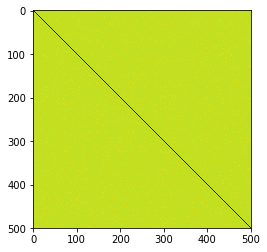

In [643]:
plt.imshow(laplacian)
plt.show()

In [644]:
laplacian

array([[-1.00000000e+00,  1.19219517e-10,  9.37890962e-31, ...,
         4.98445934e-03,  1.50225627e-22,  5.77834872e-03],
       [ 1.19219517e-10, -1.00000000e+00,  3.28402350e-41, ...,
         2.91094454e-06,  7.85667525e-05,  1.02518168e-06],
       [ 9.37890962e-31,  3.28402350e-41, -1.00000000e+00, ...,
         1.17224338e-31,  1.27255879e-48,  2.37743702e-34],
       ...,
       [ 4.98445934e-03,  2.91094454e-06,  1.17224338e-31, ...,
        -1.00000000e+00,  2.60214308e-15,  2.65989337e-02],
       [ 1.50225627e-22,  7.85667525e-05,  1.27255879e-48, ...,
         2.60214308e-15, -1.00000000e+00,  2.48724553e-16],
       [ 5.77834872e-03,  1.02518168e-06,  2.37743702e-34, ...,
         2.65989337e-02,  2.48724553e-16, -1.00000000e+00]])

In [645]:
def break_X_into_ABCD(X,d_n_columns,d_n_rows,):
    
    #returns A,B,C,D
    return X[d_n_columns:,d_n_rows:],X[:d_n_columns,d_n_rows:],X[d_n_columns:,:d_n_rows],X[:d_n_columns,:d_n_rows]

def predict(y_stack,**kwargs):
    options = {
        'k' : 2,
        'd_n_rows'     : int(y_stack.shape[0]/2),
        'd_n_cols'     : int(y_stack.shape[1]/2),
        'SVD_package'  : 'numpy'}

    options.update(kwargs)

    A,B,C,D = break_X_into_ABCD(y_stack,options['d_n_rows'],options['d_n_cols'])
    
    if(options['SVD_package'] == 'sklearn'):

        my_svd = TruncatedSVD(n_components=options['k'], n_iter=7, random_state=42)
        my_svd.fit(D) 
        reconstructed_D = np.dot(my_svd.fit_transform(D),my_svd.components_)
        
    else:
        Ud,Sd,Vd = np.linalg.svd(D)
        Sd[options['k']:] = 0
        reconstructed_D = np.dot(np.dot(Ud,np.diag(Sd)),Vd[:len(Sd)]) 
    
    D_k_penrose = np.linalg.pinv(reconstructed_D) 
    A_bi_cross_estimate = np.dot(np.dot(B.transpose(),D_k_penrose.transpose()),C.transpose())
    
    return A_bi_cross_estimate.transpose()
    
def score(*args,**kwargs):
    
    options = {
    'k' : 2,
    'd_n_rows' : int(y_stack.shape[0]/2),
    'd_n_cols' : int(y_stack.shape[1]/2),
    'SVD_package'  : 'numpy'}
    
    options.update(kwargs)

    A_bi_cross_estimate = predict(*args,**kwargs)
    A,B,C,D = break_X_into_ABCD(args[0],options['d_n_rows'],options['d_n_cols'])
    return np.sum((A-A_bi_cross_estimate)**2)

In [658]:
#x, y_stack = make_y_stack(.10,.015)         #for debugging: putting 0 yields expected behavior, but only with no shuffling
y_stack = 0+np.linalg.inv(laplacian+0*np.random.rand(laplacian.shape[0],laplacian.shape[1]))

n_interations=20
row_range = range(y_stack.shape[0])
col_range = range(y_stack.shape[1])
MSE_list = []
max_k = 20
#my_matrix = 0+ y_stack

for j in np.arange(n_interations):
    print(j)
    row_shuffling = np.array(random.sample(row_range,len(row_range)))     
    col_shuffling = np.array(random.sample(col_range,len(col_range)))
    
    my_matrix =  y_stack[row_shuffling]           #shuffling is messing things up, and it's not clear why
    my_matrix =  my_matrix[:,col_shuffling]
    #my_matrix = 0+ y_stack

    temp_MSE_list=[]
    
    for k in np.arange(2,max_k):
    

        
        temp_MSE_list.append(score(my_matrix,
                                   k=k,
                                   d_n_rows=int(y_stack.shape[0]/2),
                                   d_n_cols=int(y_stack.shape[1]/2),
                                   SVD_package='numpy'))
        
    MSE_list.append(temp_MSE_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [659]:
median_MSE_list = np.median(np.array(MSE_list),axis=0)
mean_MSE_list = np.mean(np.array(MSE_list),axis=0)
std_MSE_list = np.std(np.array(MSE_list),axis=0)/n_interations**0.5

In [660]:
print(np.arange(2,max_k)[np.argmin(median_MSE_list)])

11


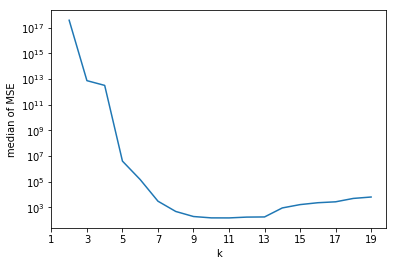

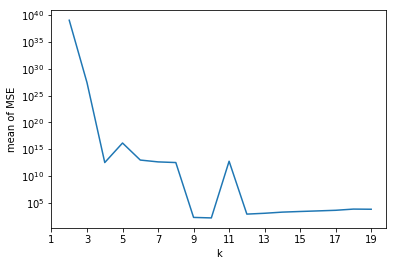

In [661]:
#plt.errorbar(np.arange(2,max_k),median_MSE_list,yerr=(std_MSE_list))
plt.semilogy(np.arange(2,max_k),median_MSE_list)
#plt.ylim(0.9*np.min(median_MSE_list),1.25*np.min(median_MSE_list))
#plt.ylim(0,1e5)
plt.ylabel("median of MSE")
plt.xticks(np.arange(1,max_k,2))
plt.xlabel("k")
plt.show()
plt.semilogy(np.arange(2,max_k),mean_MSE_list)
#plt.errorbar(np.arange(2,max_k),mean_MSE_list,yerr=(std_MSE_list))
#plt.ylim(0.9*np.min(mean_MSE_list),1.25*np.min(mean_MSE_list))
plt.xticks(np.arange(1,max_k,2))
plt.xlabel("k")
plt.ylabel("mean of MSE")
plt.show()

In [410]:
#it's very close to working.  The MSE of eigen predictor drops orders magnitude
#lot when it hits the right number of clusters

In [189]:
print(np.arange(2,max_k)[np.argmin(median_MSE_list)])
print(np.arange(2,max_k)[np.argmin(mean_MSE_list)])

3
3
